## Домашнее задание № 8
### Козел А.Г.  12 - 16.10.2022   v.1 

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого мы 
1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность

 Пробуем написать вывод по полученным результатам. 

In [23]:
#импортируем требуемые библиотеки
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as MMScaler

In [2]:
data = pd.read_excel('C:\\Users\\37533\\Desktop\\jupyter\\Real estate valuation data set.xlsx')
data.head(5)
#Вывожу первые пять строк, вижу, что столбец "No" не информативный

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#убираю столбец "No"

df = pd.DataFrame(data,columns=['X1 transaction date','X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 
                                'X5 latitude', 'X6 longitude', 'Y house price of unit area'])
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


### Выполняю анализ первональных данных

In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
X2 house age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
X4 number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
X5 latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
X6 longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Y house price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


#### Рассмотрим связь между стобцами

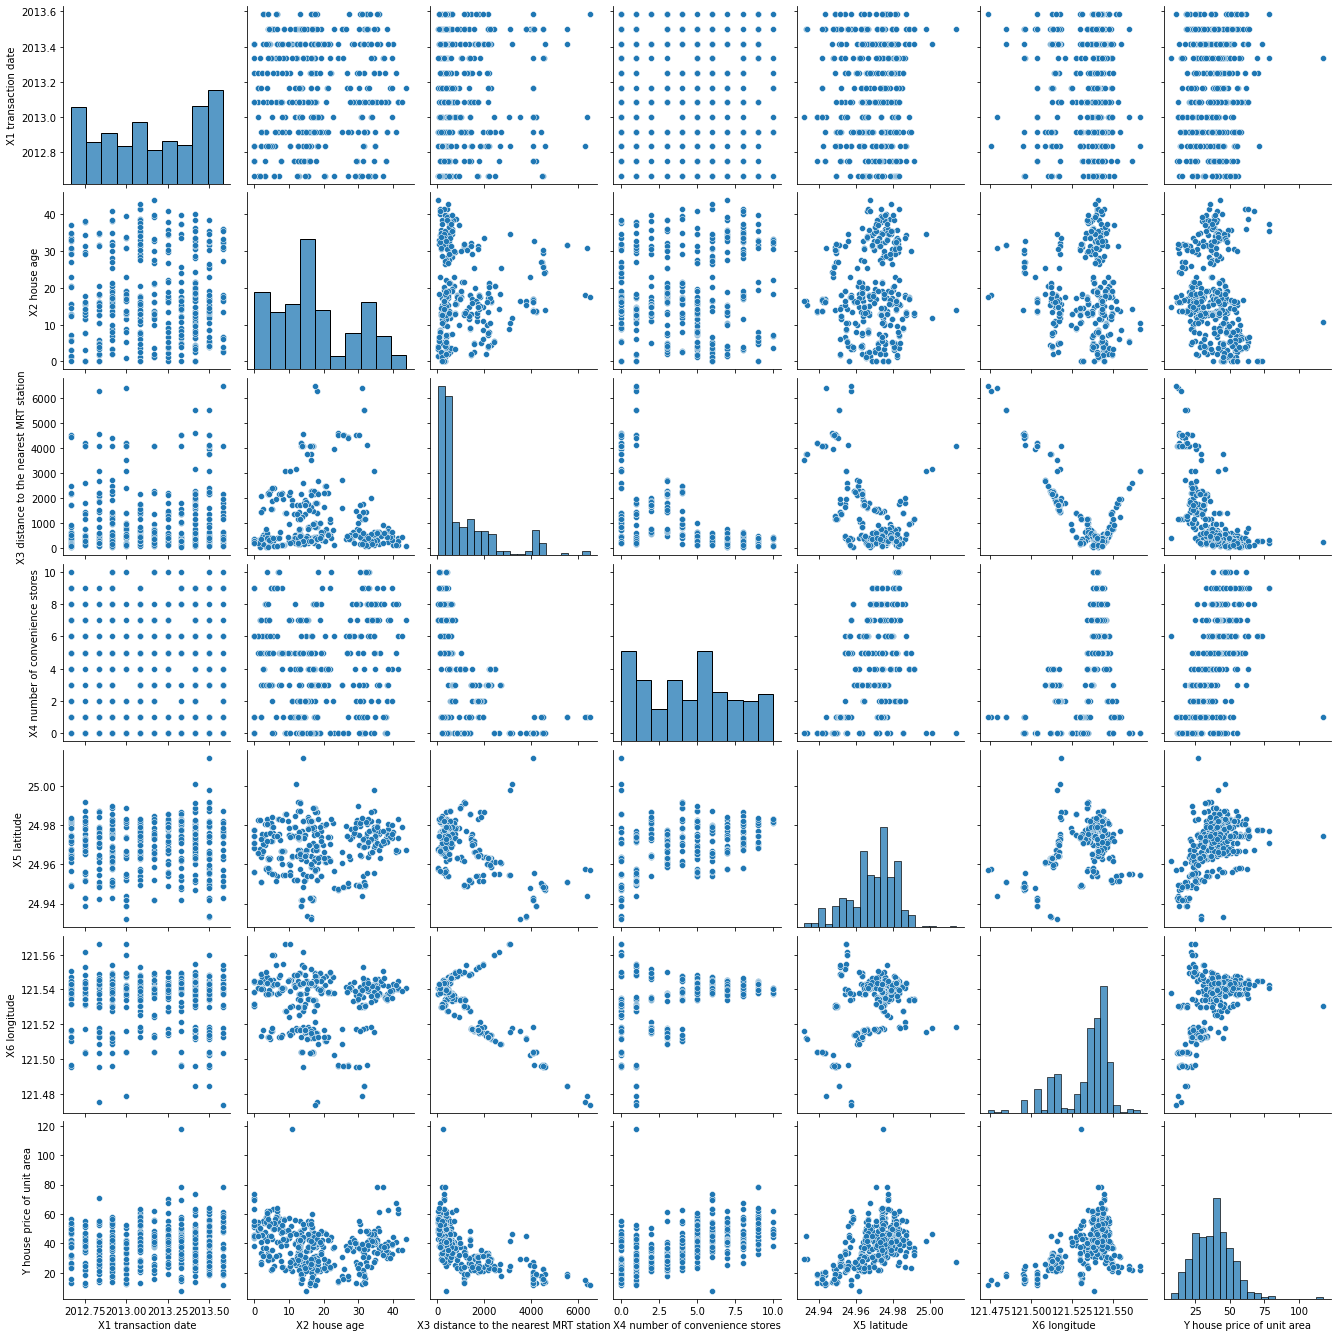

In [5]:
sns_plot = sns.pairplot(df, height=2.7)


#### Зависимость стоимости жилья от расположения дома.
Распределение выглядит вполне естественно. Более дорогая недвижимость в центре, дешевая на окраине.

<AxesSubplot:xlabel='X6 longitude', ylabel='X5 latitude'>

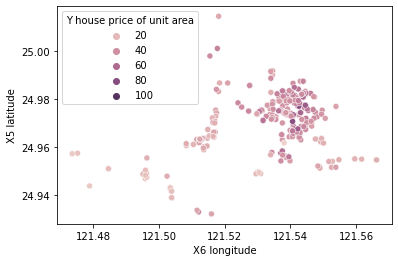

In [6]:
sns.scatterplot(x="X6 longitude", y="X5 latitude", data =df, hue=data['Y house price of unit area'])

#### Расстояние до ближайшей станции метро
Выглядит вполне предсказуемо, сочетается с ранее рассмотренной зависимость. Чем дальше от центре, тем расстояние до станции метро больше.

<AxesSubplot:xlabel='X6 longitude', ylabel='X5 latitude'>

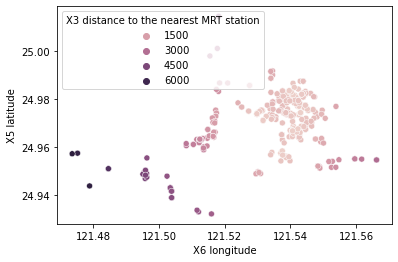

In [7]:
sns.scatterplot(x="X6 longitude", y="X5 latitude", data =df, hue=data['X3 distance to the nearest MRT station'])

#### Наличие магазинов в шаговой доступности выглядит убедительно. 
Даже значение "0" кажется вполне логичным, учитывая , что в этих же объектах недвижимости (часть) и до ближайшей станции метро до 6 км. Почему там должны быть магазины в шаговой доступности? В центре распределения в одном месте тоже мало магазинов, но значения одинаковы для всей группы домов в этом районе, поэтому данным я склонна доверять. Возможно, есть главные улицы , где больше магазинов, а есть второстепенные, где их нет в шаговой доступности.

<AxesSubplot:xlabel='X6 longitude', ylabel='X5 latitude'>

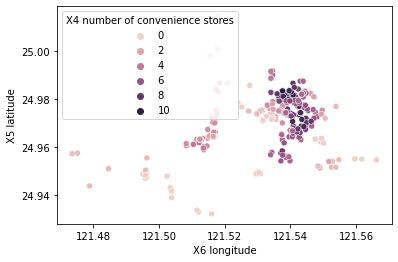

In [8]:
sns.scatterplot(x="X6 longitude", y="X5 latitude", data =df, hue=data['X4 number of convenience stores'])

#### Возраст дома. Тут никакой логики не обнаружено

<AxesSubplot:xlabel='X6 longitude', ylabel='X5 latitude'>

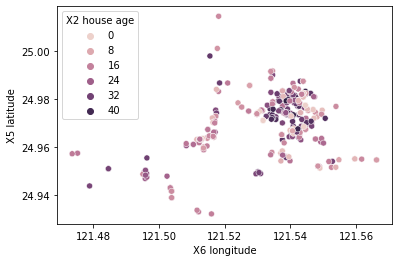

In [9]:
sns.scatterplot(x="X6 longitude", y="X5 latitude", data =df, hue=data['X2 house age'])

#### Если принять, что возраст "0" - это новостройки, то можно проверить их связь со стоимостью дома. Из диаграммы видно, что в среднем недвижимость с возрастом "0" дороже. Но 100% уверенности нет, что эти данные правильные.

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

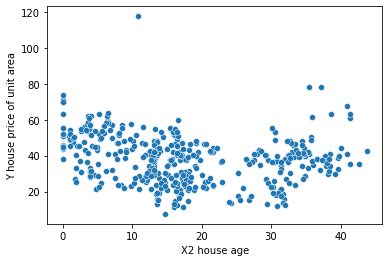

In [10]:
sns.scatterplot(x="X2 house age",y="Y house price of unit area", data =df)

### Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1

In [11]:
df = pd.DataFrame(data,columns=['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 
                                'X5 latitude', 'X6 longitude', 'Y house price of unit area'])

In [12]:
#решила скалировать не все данные. Убираю столбец дата "X1 transaction date" 

mm_scaler = MMScaler(feature_range=(-1, 1))
df_new = mm_scaler.fit_transform(df)
df_new = pd.DataFrame(df_new, columns=df.columns)
df_new

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.461187,-0.980975,1.0,0.233883,0.438646,-0.448590
1,-0.109589,-0.912381,0.8,0.169898,0.422903,-0.370337
2,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.277525
3,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.141037
4,-0.771689,-0.886402,0.0,0.146389,0.486306,-0.353958
...,...,...,...,...,...,...
409,-0.374429,0.255641,-1.0,-0.770238,-0.346992,-0.858053
410,-0.744292,-0.979249,0.8,0.024237,0.500323,-0.228389
411,-0.141553,-0.886278,0.4,0.142996,0.430451,-0.399454
412,-0.630137,-0.974808,0.0,-0.159719,0.447919,-0.182894


### Обрабатываем пропуски. Обрабатываем выбросы.

C:\Users\37533\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\37533\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

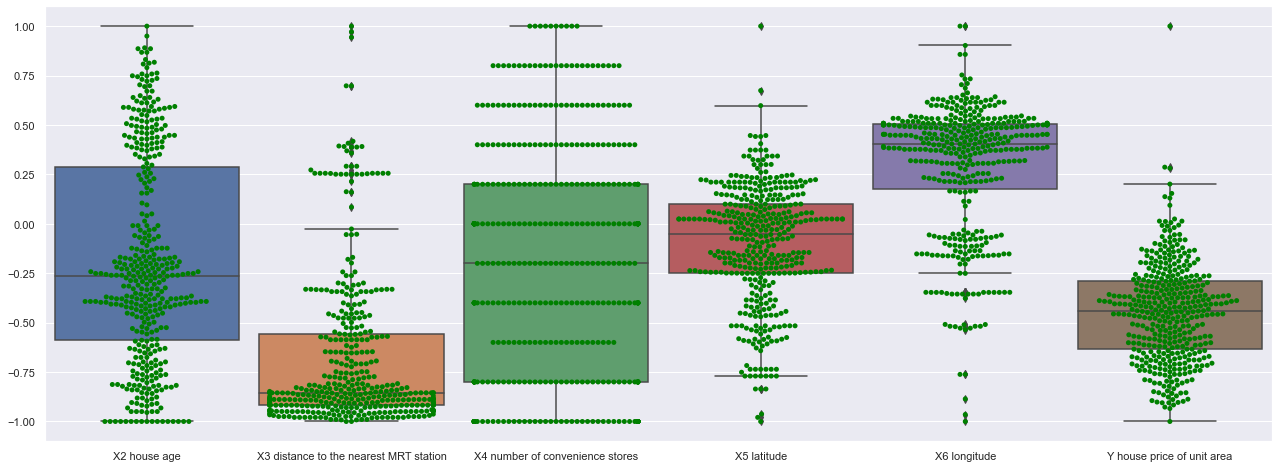

In [13]:
sns.set(rc={'figure.figsize':(22,8)})

sns.boxplot(data=df_new, width=0.9)
sns.swarmplot(data=df_new, color="green")


In [14]:
from scipy import stats
#удаляем все данные, которые не находятся в пределах 3х стандартных отклонений
df_new = df_new[(np.abs(stats.zscore(df_new)) < 3).all(axis=1)]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            407 non-null    float64
 1   X3 distance to the nearest MRT station  407 non-null    float64
 2   X4 number of convenience stores         407 non-null    float64
 3   X5 latitude                             407 non-null    float64
 4   X6 longitude                            407 non-null    float64
 5   Y house price of unit area              407 non-null    float64
dtypes: float64(6)
memory usage: 22.3 KB


C:\Users\37533\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\37533\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


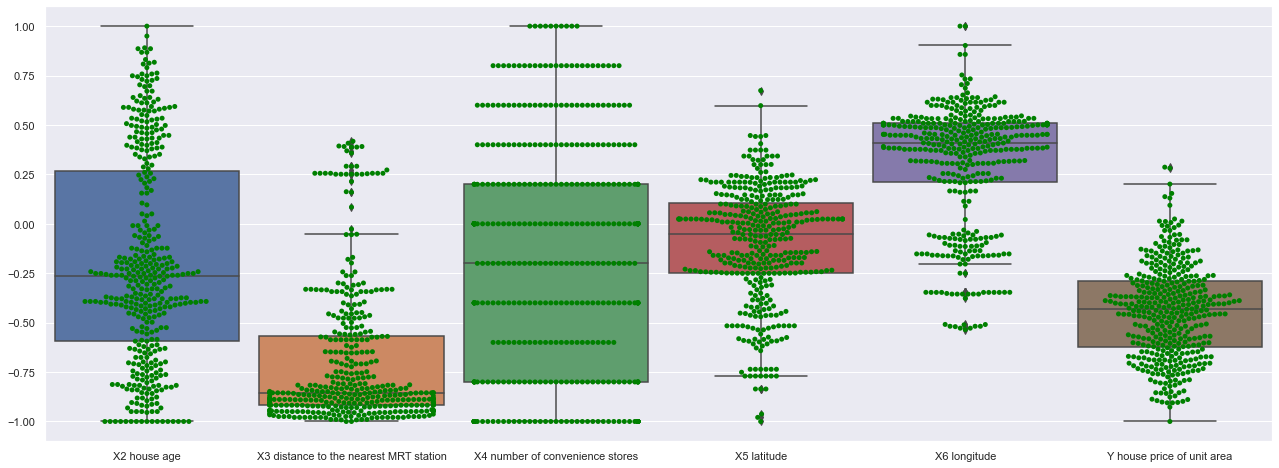

In [16]:
sns.set(rc={'figure.figsize':(22,8)})

sns.boxplot(data=df_new, width=0.9)
sns.swarmplot(data=df_new, color="green")


None

### Строим матрицу корреляции.


In [22]:
# Поиск попарной корреляции всех столбцов. Любые значения NaN автоматически исключаются. Любой нечисловой тип данных или столбцы в кадре данных игнорируются.
corr_df = df_new.corr()
corr_df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,-0.007039,0.057119,0.075027,-0.022561,-0.202244
X3 distance to the nearest MRT station,-0.007039,1.000000,-0.618373,-0.631557,-0.769217,-0.691075
X4 number of convenience stores,0.057119,-0.618373,1.000000,0.458272,0.439598,0.604845
X5 latitude,0.075027,-0.631557,0.458272,1.000000,0.408213,0.569685
X6 longitude,-0.022561,-0.769217,0.439598,0.408213,1.000000,0.522886
Y house price of unit area,-0.202244,-0.691075,0.604845,0.569685,0.522886,1.000000


<AxesSubplot:>

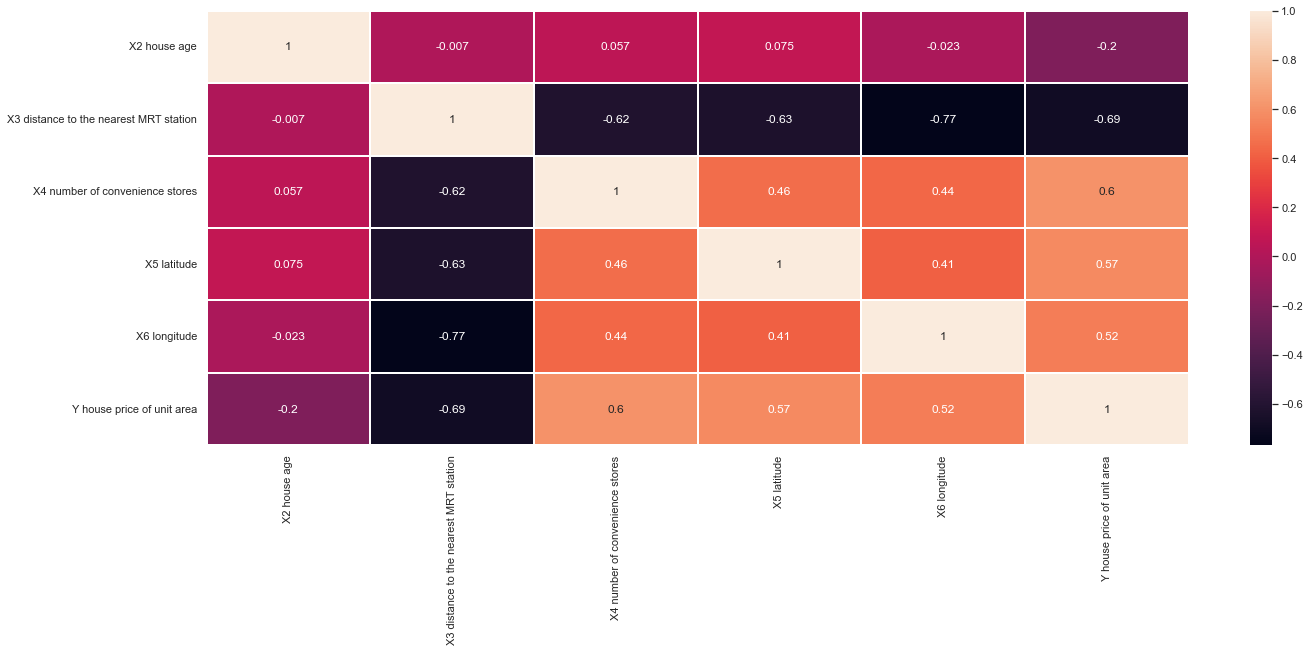

In [18]:
sns.heatmap(corr_df, annot=True, linewidths=2)



По матрице можно сделать вывод, что чем ближе объект недвижимости находится от станции метро, тем выше цена и больше количество магазинов вокруг.
От возраста дома вообще ничего не зависит.

### Строим гистограммы распределения

C:\Users\37533\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\37533\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\37533\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

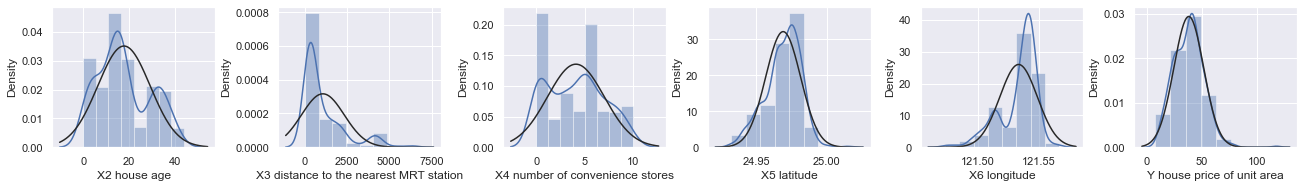

In [41]:
names = list(df_new[:-1])
fig, axes = plt.subplots(1, 6, constrained_layout=True, figsize=(18,2.5))

for i,t in enumerate(names):
    sns.distplot(df[t], fit=norm, bins=8, ax=axes[i % 6])

### Тест на нормальность

In [56]:
from scipy.stats import shapiro, normaltest


### Тест shapiro

In [70]:
def print_is_shapiro(data_set, column):
    stat, p = shapiro(data_set[column])
    print('Данные теста Шапиро-Уилка:')
    print('Статистика = %.3f, p = %.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print(f"{column}: Распределение нормальное")
    else:
        print(f"{column}: Распределение не соответствует нормальному")
print("ДАННЫЕ ПОСЛЕ КОРРЕЛЯЦИИ")
print()
for column in corr_df:
    print_is_shapiro(corr_df, column)
print()
print("ДАННЫЕ ПОСЛЕ ОБРАБОТКИ ВЫБРОСОВ")
print()
for column in df_new:
    print_is_shapiro(df_new, column)

ДАННЫЕ ПОСЛЕ КОРРЕЛЯЦИИ

Данные теста Шапиро-Уилка:
Статистика = 0.710, p = 0.008
X2 house age: Распределение не соответствует нормальному
Данные теста Шапиро-Уилка:
Статистика = 0.751, p = 0.020
X3 distance to the nearest MRT station: Распределение не соответствует нормальному
Данные теста Шапиро-Уилка:
Статистика = 0.937, p = 0.635
X4 number of convenience stores: Распределение нормальное
Данные теста Шапиро-Уилка:
Статистика = 0.937, p = 0.637
X5 latitude: Распределение нормальное
Данные теста Шапиро-Уилка:
Статистика = 0.924, p = 0.537
X6 longitude: Распределение нормальное
Данные теста Шапиро-Уилка:
Статистика = 0.896, p = 0.348
Y house price of unit area: Распределение нормальное

ДАННЫЕ ПОСЛЕ ОБРАБОТКИ ВЫБРОСОВ

Данные теста Шапиро-Уилка:
Статистика = 0.946, p = 0.000
X2 house age: Распределение не соответствует нормальному
Данные теста Шапиро-Уилка:
Статистика = 0.749, p = 0.000
X3 distance to the nearest MRT station: Распределение не соответствует нормальному
Данные теста Шапи

### Normaltest

In [73]:
def print_is_normal(data_set, column):
    stat, p = stats.normaltest(data_set[column])

     
    alpha = 0.05
    if p > alpha:
        print(f"{column}: Распределение нормальное")
    else:
        print(f"{column}: Распределение не соответствует нормальному")
print('Результаты normaltest:')
print() 
print("ДАННЫЕ ПОСЛЕ ОБРАБОТКИ ВЫБРОСОВ")
print()
for column in df_new:
    print_is_normal(df_new, column)


Результаты normaltest:

ДАННЫЕ ПОСЛЕ ОБРАБОТКИ ВЫБРОСОВ

X2 house age: Распределение не соответствует нормальному
X3 distance to the nearest MRT station: Распределение не соответствует нормальному
X4 number of convenience stores: Распределение не соответствует нормальному
X5 latitude: Распределение не соответствует нормальному
X6 longitude: Распределение не соответствует нормальному
Y house price of unit area: Распределение нормальное


### Выводы прописывала по ходу выполнения